## ISSS610 Applied Machine Learning - Group 2

### Customer Satisfaction Rating Prediction of Airbnb London Listings

## Load Listing data

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

df_listing = pd.read_csv("data_london/listings.csv")

print(df_listing.shape)

(85207, 106)


In [2]:
pd.set_option('display.max_columns', None)
df_listing.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20200510041510,2020-05-13,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,NaN,NaN,https://a0.muscache.com/im/pictures/ffb507b7-9...,NaN,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,80%,88%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",LB of Islington,Islington,NaN,Islington,Greater London,N4 3,London,"Islington, United Kingdom",GB,United Kingdom,51.56802,-0.11121,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",538.0,$65.00,$333.00,"$1,176.00",$100.00,$15.00,1,$15.00,1,29,1,1,29,29,1.0,29.0,13 months ago,t,26,56,86,361,2020-05-13,21,6,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,f,f,3,1,2,0,0.18
1,15400,https://www.airbnb.com/rooms/15400,20200510041510,2020-05-13,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,NaN,NaN,https://a0.muscache.com/im/pictures/428392/462...,NaN,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,100%,86%,f,https://a0.mus

In [3]:
relevant_col = ['id','host_id','host_since',
                'host_response_rate','host_acceptance_rate','host_is_superhost',
                'host_total_listings_count','host_verifications',
                'host_has_profile_pic','host_identity_verified','neighbourhood_cleansed',
                'city','state','zipcode','latitude','longitude',
                'is_location_exact','property_type','room_type','accommodates',
                'bathrooms','bedrooms','beds','bed_type','amenities','price',
                'security_deposit','cleaning_fee','guests_included','extra_people',
                'minimum_nights','maximum_nights','availability_30','availability_60',
                'availability_90','availability_365','calendar_last_scraped','number_of_reviews',
                'number_of_reviews_ltm','first_review','last_review','review_scores_rating',
                'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                'review_scores_communication','review_scores_location','review_scores_value',
                'instant_bookable','cancellation_policy','require_guest_profile_picture',
                'require_guest_phone_verification','calculated_host_listings_count',
                'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                'calculated_host_listings_count_shared_rooms','reviews_per_month','calendar_updated']

df_listing = df_listing[relevant_col]
df_listing.fillna(0, inplace=True)
df_listing.rename(columns={"id": "listing_id"}, inplace=True)
df_listing.replace("t", 1, inplace=True)
df_listing.replace("f", 0, inplace=True)

dollar_col = ['price','security_deposit','cleaning_fee','extra_people']
percentage_col = ['host_response_rate','host_acceptance_rate']
df_listing[dollar_col] = df_listing[dollar_col].replace({'\$':''}, regex=True)
df_listing[dollar_col] = df_listing[dollar_col].replace({',':''}, regex=True)
df_listing[percentage_col] = df_listing[percentage_col].replace({'%':''}, regex=True)

In [4]:
df_listing.head()

,listing_id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,calendar_updated
0,13913,54730,2009-11-16,80,88,0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1,1,Islington,Islington,Greater London,N4 3,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",65.00,100.00,15.00,1,15.00,1,29,26,56,86,361,2020-05-13,21,6,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0,0,3,1,2,0,0.18,13 months ago
1,15400,60302,2009-12-05,100,86,0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Kensington and Chelsea,London,0,SW3,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.00,150.00,50.00,2,0.00,10,50,0,2,2,256,2020-05-13,89,4,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1,1,1,1,0,0,0.70,4 months ago
2,17402,67564,2010-01-04,80,95,0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Westminster,London,Fitzrovia,W1T4BP,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",300.00,350.00,90.00,3,10.00,3,365,25,51,76,330,2020-05-12,42,2,2011-03-21,2019-11-02,94.0,10.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period,0,0,15,15,0,0,0.38,2 months ago
3,17506,67915,2010-01-05,100,0,0,3.0,"['email', 'phone', 'jumio', 'selfie', 'governm...",1,0,Hammersmith and Fulham,London,0,SW6 1EJ,51.47935,-0.19743,1,Bed and breakfast,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Breakfast...",150.00,0,0,1,0.00,3,21,25,55,85,360,2020-05-12,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,strict_14_with_grace_period,0,0,2,0,2,0,0.00,40 months ago
4,25023,102813,2010-04-03,100,93,1,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,0,Wandsworth,Wimbledon,London,SW19 6QH,51.44687,-0.21874,1,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",El...",65.00,350.00,55.00,2,11.00,21,1125,0,21,42,42,2020-05-14,35,8,2016-03-05,2020-03-30,93.0,10.0,9.0,9.0,10.0,9.0,9.0,0,moderate,0,0,1,1,0,0,0.69,6 weeks ago


In [5]:
# remove listings without first review dates - assume these listings are new
df_listing_1 = df_listing[(df_listing['first_review'] != 0)]

# remove listings where calendar has not been updated by host
df_listing_1 = df_listing[(df_listing['calendar_updated'] != 'never')]
del df_listing_1['calendar_updated']

df_listing_1.shape

(84584, 57)

In [6]:
df_listing_1['host_since'] = pd.to_datetime(df_listing_1['host_since'])
df_listing_1['first_review'] = pd.to_datetime(df_listing_1['first_review'])
df_listing_1['calendar_last_scraped'] = pd.to_datetime(df_listing_1['calendar_last_scraped'])

In [7]:
# create host_duration_days
df_listing_1['host_duration_days'] = df_listing_1['calendar_last_scraped'].sub(df_listing_1['host_since'], axis=0)
df_listing_1['host_duration_days'] = df_listing_1['host_duration_days'] / np.timedelta64(1, 'D')
del df_listing_1['host_since']

# create listing_duration_days by using first review as proxy for start date of listing
df_listing_1['listing_duration_days'] = df_listing_1['calendar_last_scraped'].sub(df_listing_1['first_review'], 
                                                                                  axis=0)
df_listing_1['listing_duration_days'] = df_listing_1['listing_duration_days'] / np.timedelta64(1, 'D')

In [8]:
df_listing_1.head(3)

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,listing_duration_days
0,13913,54730,80,88,0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1,1,Islington,Islington,Greater London,N4 3,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",65.00,100.00,15.00,1,15.00,1,29,26,56,86,361,2020-05-13,21,6,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0,0,3,1,2,0,0.18,3831.0,3556.0
1,15400,60302,100,86,0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Kensington and Chelsea,London,0,SW3,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.00,150.00,50.00,2,0.00,10,50,0,2,2,256,2020-05-13,89,4,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1,1,1,1,0,0,0.70,3812.0,3796.0
2,17402,67564,80,95,0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Westminster,London,Fitzrovia,W1T4BP,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",300.00,350.00,90.00,3,10.00,3,365,25,51,76,330,2020-05-12,42,2,2011-03-21,2019-11-02,94.0,10.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period,0,0,15,15,0,0,0.38,3781.0,3340.0


In [9]:
df_listing_1['price'] = pd.to_numeric(df_listing_1['price'])
df_listing_1['security_deposit'] = pd.to_numeric(df_listing_1['security_deposit'])
df_listing_1['cleaning_fee'] = pd.to_numeric(df_listing_1['cleaning_fee'])
df_listing_1['extra_people'] = pd.to_numeric(df_listing_1['extra_people'])
df_listing_1.shape

(84584, 58)

In [10]:
#changing rates to decimals
df_listing_1['host_acceptance_rate'] = pd.to_numeric(df_listing_1['host_acceptance_rate'])
df_listing_1['host_response_rate'] = pd.to_numeric(df_listing_1['host_response_rate'])
df_listing_1['host_acceptance_rate']=df_listing_1['host_acceptance_rate']/100
df_listing_1['host_response_rate']=df_listing_1['host_response_rate']/100

### Create Regions

In [11]:
#renaming boroughs based on regions
def set_region(df):
    if df["neighbourhood_cleansed"] in ['Camden', 'City of London','Kensington and Chelsea', 'Islington', 
                                        'Lambeth', 'Southwark', 'Westminster']:
        return "Central"
    elif df["neighbourhood_cleansed"] in ['Barking and Dagenham', 'Bexley', 'Greenwich', 'Hackney', 'Havering', 
                                          'Lewisham', 'Newham', 'Redbridge', 'Tower Hamlets', 'Waltham Forest']:
        return "East"
    elif df["neighbourhood_cleansed"] in ['Barnet', 'Enfield', 'Haringey']:
        return "North"
    elif df["neighbourhood_cleansed"] in ['Bromley', 'Croydon', 'Kingston upon Thames', 'Merton', 'Sutton', 
                                          'Wandsworth']:
        return "South"
    else:
        return "West"

df_listing_1 = df_listing_1.assign(region=df_listing_1.apply(set_region, axis=1))
df_listing_1.head(3)

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,listing_duration_days,region
0,13913,54730,0.8,0.88,0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1,1,Islington,Islington,Greater London,N4 3,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",65.0,100.0,15.0,1,15.0,1,29,26,56,86,361,2020-05-13,21,6,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0,0,3,1,2,0,0.18,3831.0,3556.0,Central
1,15400,60302,1.0,0.86,0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Kensington and Chelsea,London,0,SW3,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,150.0,50.0,2,0.0,10,50,0,2,2,256,2020-05-13,89,4,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1,1,1,1,0,0,0.70,3812.0,3796.0,Central
2,17402,67564,0.8,0.95,0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Westminster,London,Fitzrovia,W1T4BP,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",300.0,350.0,90.0,3,10.0,3,365,25,51,76,330,2020-05-12,42,2,2011-03-21,2019-11-02,94.0,10.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period,0,0,15,15,0,0,0.38,3781.0,3340.0,Central


## Basic EDA

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.boxplot(df_listing_1["price"])
plt.title("Boxplot of London Airbnb Price")
plt.ylabel('Price')

plt.subplot(2, 2, 2)
plt.hist(df_listing_1["price"], bins=50)
plt.title("Distribution of London Airbnb Price")
plt.xlabel('Price')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
plt.hist(df_listing_1["host_duration_days"], bins=50)
plt.title("Distribution of Host Duration Days")
plt.xlabel('Days')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.boxplot(df_listing_1["host_total_listings_count"])
plt.title('Boxplot of Host Total Listing Count')
plt.xlabel('Host Total Listing Count')
plt.ylabel('Count')

plt.show()

<Figure size 1500x1000 with 4 Axes>

In [13]:
df_listing_1['price'].describe()

count    84584.000000
mean       128.376620
std        303.793711
min          0.000000
25%         46.000000
50%         81.000000
75%        140.000000
max      20471.000000
Name: price, dtype: float64

In [14]:
df_listing_1['host_total_listings_count'].describe()

count    84584.000000
mean        24.962463
std        132.431266
min          0.000000
25%          1.000000
50%          1.000000
75%          5.000000
max       1355.000000
Name: host_total_listings_count, dtype: float64

In [15]:
df_listing_1['host_duration_days'].describe()

count    84584.000000
mean      1596.939882
std        882.579634
min          3.000000
25%        961.000000
50%       1629.000000
75%       2164.000000
max      18397.000000
Name: host_duration_days, dtype: float64

Clear outliers in price column, to remove:
- Listings with prices greater than $800.
- Listings with "0" review scores rating.
- Listings with "host_total_listings_count" == 0

In [16]:
df_listing_2 = df_listing_1[(df_listing_1['price'] <= 800) &
                            (df_listing_1['review_scores_rating'] != 0) &
                            (df_listing_1['host_total_listings_count'] != 0)]
df_listing_2.shape

(57669, 59)

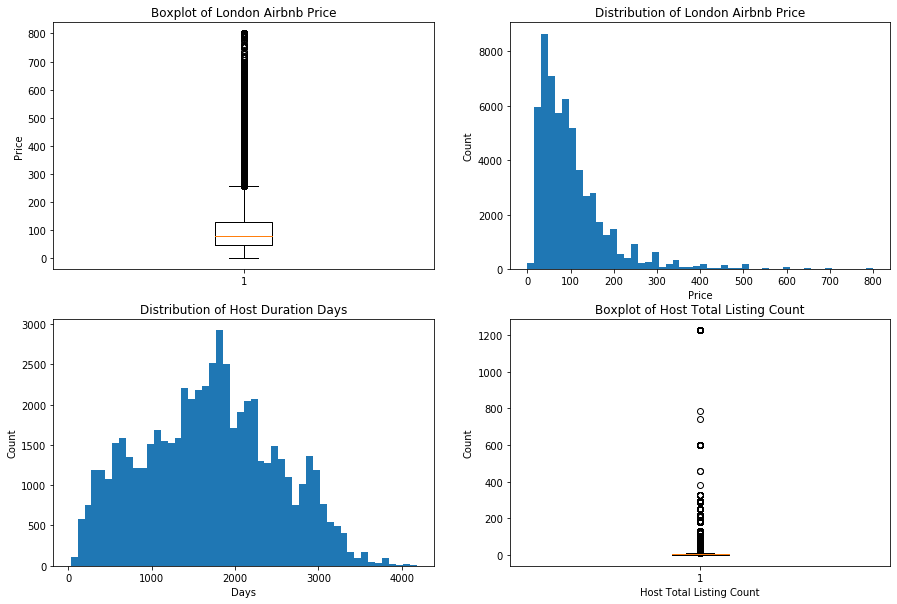

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.boxplot(df_listing_2["price"])
plt.title("Boxplot of London Airbnb Price")
plt.ylabel('Price')

plt.subplot(2, 2, 2)
plt.hist(df_listing_2["price"], bins=50)
plt.title("Distribution of London Airbnb Price")
plt.xlabel('Price')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
plt.hist(df_listing_2["host_duration_days"], bins=50)
plt.title("Distribution of Host Duration Days")
plt.xlabel('Days')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.boxplot(df_listing_2["host_total_listings_count"])
plt.title('Boxplot of Host Total Listing Count')
plt.xlabel('Host Total Listing Count')
plt.ylabel('Count')

plt.show()

In [18]:
df_listing_2['price'].describe()

count    57669.000000
mean       105.049784
std         90.374186
min          0.000000
25%         45.000000
50%         80.000000
75%        130.000000
max        800.000000
Name: price, dtype: float64

 Airbnb Occupancy Rate= Booked Nights/ Total Available Nights

In [19]:
df_listing_2['occupancy_rate'] = (365 - df_listing_2['availability_365'])/365
df_listing_2.head(3)

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,listing_duration_days,region,occupancy_rate
0,13913,54730,0.8,0.88,0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1,1,Islington,Islington,Greater London,N4 3,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",65.0,100.0,15.0,1,15.0,1,29,26,56,86,361,2020-05-13,21,6,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0,0,3,1,2,0,0.18,3831.0,3556.0,Central,0.010959
1,15400,60302,1.0,0.86,0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Kensington and Chelsea,London,0,SW3,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,150.0,50.0,2,0.0,10,50,0,2,2,256,2020-05-13,89,4,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1,1,1,1,0,0,0.70,3812.0,3796.0,Central,0.298630
2,17402,67564,0.8,0.95,0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Westminster,London,Fitzrovia,W1T4BP,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",300.0,350.0,90.0,3,10.0,3,365,25,51,76,330,2020-05-12,42,2,2011-03-21,2019-11-02,94.0,10.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period,0,0,15,15,0,0,0.38,3781.0,3340.0,Central,0.095890


In [20]:
df_listing_2['occupancy_rate'].describe()

count    57669.000000
mean         0.661513
std          0.378598
min          0.000000
25%          0.304110
50%          0.791781
75%          1.000000
max          1.000000
Name: occupancy_rate, dtype: float64

In [21]:
reviews_cols = ['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                'review_scores_communication','review_scores_location','review_scores_value']

df_listing_2['calculated_review_rating'] = df_listing_2[reviews_cols].sum(axis=1)
df_listing_2['calculated_review_rating'] = round(df_listing_2['calculated_review_rating']/6,3)
df_listing_2.head(3)

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,listing_duration_days,region,occupancy_rate,calculated_review_rating
0,13913,54730,0.8,0.88,0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1,1,Islington,Islington,Greater London,N4 3,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",65.0,100.0,15.0,1,15.0,1,29,26,56,86,361,2020-05-13,21,6,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0,0,3,1,2,0,0.18,3831.0,3556.0,Central,0.010959,9.667
1,15400,60302,1.0,0.86,0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Kensington and Chelsea,London,0,SW3,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,150.0,50.0,2,0.0,10,50,0,2,2,256,2020-05-13,89,4,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1,1,1,1,0,0,0.70,3812.0,3796.0,Central,0.298630,9.833
2,17402,67564,0.8,0.95,0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Westminster,London,Fitzrovia,W1T4BP,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",300.0,350.0,90.0,3,10.0,3,365,25,51,76,330,2020-05-12,42,2,2011-03-21,2019-11-02,94.0,10.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period,0,0,15,15,0,0,0.38,3781.0,3340.0,Central,0.095890,9.333


In [22]:
df_listing_2['calculated_review_rating'].describe()

count    57669.000000
mean         9.455270
std          0.849496
min          0.000000
25%          9.333000
50%          9.667000
75%         10.000000
max         10.000000
Name: calculated_review_rating, dtype: float64

In [23]:
df_listing_3 = df_listing_2[(df_listing_2['calculated_review_rating'] != 0)]
df_listing_3.shape

(57636, 61)

In [24]:
df_listing_3['calculated_review_rating'].describe()

count    57636.000000
mean         9.460684
std          0.819047
min          0.333000
25%          9.333000
50%          9.667000
75%         10.000000
max         10.000000
Name: calculated_review_rating, dtype: float64

In [25]:
df_listing_3['calculated_review_rating'].value_counts(bins=10)

(9.033, 10.0]     47092
(8.067, 9.033]     7932
(7.1, 8.067]       1476
(6.133, 7.1]        488
(5.166, 6.133]      242
(4.2, 5.166]        135
(1.3, 2.266]        103
(3.233, 4.2]         91
(2.266, 3.233]       67
(0.322, 1.3]         10
Name: calculated_review_rating, dtype: int64

## Include Neighbourhood Crime Rates 

Source: https://data.london.gov.uk/dataset/recorded_crime_rates

The latest data only has 2016 - 2017 crime rates.

In [26]:
crime_rate = pd.read_csv('data_london/crime rates.csv')
crime_rate = crime_rate[(crime_rate['Year'] == '2016-17')&(crime_rate['Offences']=='All recorded offences')]
crime_rate.head()

,Code,Borough,Year,Offences,Rate,Number_of_offences
629,E09000002,Barking and Dagenham,2016-17,All recorded offences,70.9,"14,638"
630,E09000003,Barnet,2016-17,All recorded offences,55.8,"21,549"
631,E09000004,Bexley,2016-17,All recorded offences,45.6,"11,163"
632,E09000005,Brent,2016-17,All recorded offences,70.8,"23,237"
633,E09000006,Bromley,2016-17,All recorded offences,52.7,"17,243"


In [27]:
crime_rate['Rate'] = crime_rate['Rate']/100
crime_rate.head()

,Code,Borough,Year,Offences,Rate,Number_of_offences
629,E09000002,Barking and Dagenham,2016-17,All recorded offences,0.709,"14,638"
630,E09000003,Barnet,2016-17,All recorded offences,0.558,"21,549"
631,E09000004,Bexley,2016-17,All recorded offences,0.456,"11,163"
632,E09000005,Brent,2016-17,All recorded offences,0.708,"23,237"
633,E09000006,Bromley,2016-17,All recorded offences,0.527,"17,243"


In [28]:
crime_rate.shape

(37, 6)

In [29]:
# merge together with listing data

df_listing_4 = pd.merge(df_listing_3, crime_rate, how='left', left_on=['neighbourhood_cleansed'], 
                        right_on=['Borough'])
df_listing_4.head(3)

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,listing_duration_days,region,occupancy_rate,calculated_review_rating,Code,Borough,Year,Offences,Rate,Number_of_offences
0,13913,54730,0.8,0.88,0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1,1,Islington,Islington,Greater London,N4 3,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",65.0,100.0,15.0,1,15.0,1,29,26,56,86,361,2020-05-13,21,6,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0,0,3,1,2,0,0.18,3831.0,3556.0,Central,0.010959,9.667,E09000019,Islington,2016-17,All recorded offences,0.999,"23,254"
1,15400,60302,1.0,0.86,0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Kensington and Chelsea,London,0,SW3,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,150.0,50.0,2,0.0,10,50,0,2,2,256,2020-05-13,89,4,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1,1,1,1,0,0,0.70,3812.0,3796.0,Central,0.298630,9.833,E09000020,Kensington and Chelsea,2016-17,All recorded offences,1.098,"17,206"
2,17402,67564,0.8,0.95,0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Westminster,London,Fitzrovia,W1T4BP,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",300.0,350.0,90.0,3,10.0,3,365,25,51,76,330,2020-05-12,42,2,2011-03-21,2019-11-02,94.0,10.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period,0,0,15,15,0,0,0.38,3781.0,3340.0,Central,0.095890,9.333,E09000033,Westminster,2016-17,All recorded offences,1.713,"42,414"


In [30]:
df_listing_4 = df_listing_4.rename(columns={"Rate": "crime_rate"})

df_listing_4.drop(['Number_of_offences', 'Offences', 'Year','Borough','Code'], axis=1, inplace=True)
df_listing_4.head(3)

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,listing_duration_days,region,occupancy_rate,calculated_review_rating,crime_rate
0,13913,54730,0.8,0.88,0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1,1,Islington,Islington,Greater London,N4 3,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",65.0,100.0,15.0,1,15.0,1,29,26,56,86,361,2020-05-13,21,6,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0,0,3,1,2,0,0.18,3831.0,3556.0,Central,0.010959,9.667,0.999
1,15400,60302,1.0,0.86,0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Kensington and Chelsea,London,0,SW3,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,150.0,50.0,2,0.0,10,50,0,2,2,256,2020-05-13,89,4,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1,1,1,1,0,0,0.70,3812.0,3796.0,Central,0.298630,9.833,1.098
2,17402,67564,0.8,0.95,0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Westminster,London,Fitzrovia,W1T4BP,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",300.0,350.0,90.0,3,10.0,3,365,25,51,76,330,2020-05-12,42,2,2011-03-21,2019-11-02,94.0,10.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period,0,0,15,15,0,0,0.38,3781.0,3340.0,Central,0.095890,9.333,1.713


In [31]:
# some neighbourhoods have null crime rates, replace with zeros
df_listing_4.fillna(0, inplace=True)

In [32]:
df_listing_4['crime_rate'].describe()

count    57636.000000
mean         0.936650
std          0.325922
min          0.000000
25%          0.708000
50%          0.908000
75%          1.031000
max          1.713000
Name: crime_rate, dtype: float64

In [33]:
df_listing_4.shape

(57636, 62)

## Top 10 Amenities extraction and conversion to categorical variables

In [34]:
from bs4 import BeautifulSoup 
import re # For regular expressions
from nltk.corpus import stopwords
import nltk.data

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [35]:
# This function converts a text to a sequence of words.
def review_wordlist(review, remove_stopwords=True):
    # 1. Removing html tags
    review_text = BeautifulSoup(review).get_text()
    # 2. Removing non-letter.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    # 3. Converting to lower case and splitting
    words = review_text.lower().split()
    # 4. Optionally remove stopwords
    if remove_stopwords:
        stops = set(stopwords.words("english"))     
        words = [w for w in words if not w in stops]
    
    return(words)

def review_sentences(review, tokenizer, remove_stopwords=True):
    # 1. Using nltk tokenizer
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    # 2. Loop for each sentence
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(review_wordlist(raw_sentence,\
                                            remove_stopwords))

    # This returns the list of lists
    return sentences

sentences = []
count=0
print("Parsing sentences from training set")
for review in df_listing_4['amenities']:
    sentences += review_sentences(review, tokenizer)
    count+=1
    if count%10000 == 0:
        print(count)
    
print("Finished parsing sentences")

Parsing sentences from training set
10000
20000
30000
40000
50000
Finished parsing sentences


In [36]:
count = dict()
for sen in sentences:
    for word in sen:
        if word in count:
            count[word] +=1
        else:
            count[word] = 1
count

{'tv': 50569,
 'cable': 9890,
 'wifi': 56820,
 'kitchen': 53735,
 'paid': 13378,
 'parking': 30852,
 'premises': 23298,
 'smoking': 3963,
 'allowed': 34870,
 'free': 17424,
 'street': 7448,
 'buzzer': 7209,
 'wireless': 7209,
 'intercom': 7209,
 'heating': 55355,
 'family': 17785,
 'kid': 17785,
 'friendly': 56730,
 'washer': 49682,
 'dryer': 69586,
 'smoke': 51513,
 'detector': 88007,
 'carbon': 36494,
 'monoxide': 36494,
 'fire': 19546,
 'extinguisher': 19538,
 'essentials': 55675,
 'shampoo': 41342,
 'lock': 14443,
 'bedroom': 14297,
 'door': 13755,
 'hangers': 48334,
 'hair': 43498,
 'iron': 46429,
 'laptop': 38945,
 'workspace': 38945,
 'outlet': 381,
 'covers': 381,
 'bathtub': 6243,
 'children': 4482,
 'books': 2994,
 'toys': 2994,
 'babysitter': 1402,
 'recommendations': 1402,
 'crib': 6187,
 'pack': 3235,
 'n': 3235,
 'play': 3235,
 'travel': 3235,
 'room': 10882,
 'darkening': 2508,
 'shades': 2508,
 'dinnerware': 1488,
 'hot': 40360,
 'water': 38497,
 'bed': 25543,
 'linens'

In [37]:
dist = []
for key,value in count.items():
    dist.append(value)


Text(0, 0.5, 'Count')

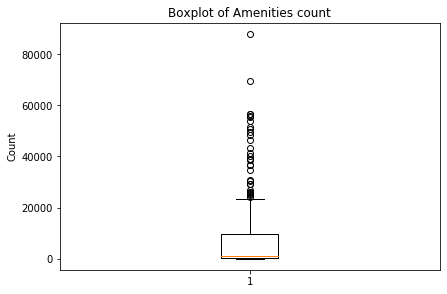

In [38]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.boxplot(dist)
plt.title("Boxplot of Amenities count")
plt.ylabel('Count')

In [39]:
amen = []
for key,value in count.items():
    amen.append(value)
    
amen.sort()
amen1 = amen[-15:-1]
amen1.append(amen[-1])
amen1

[40360,
 41342,
 43498,
 46429,
 48334,
 49682,
 50569,
 51513,
 53735,
 55355,
 55675,
 56730,
 56820,
 69586,
 88007]

In [40]:
amenities = []
for top in amen1:
    for key,value in count.items():
        if(top == value):
            amenities.append(key)
amenities

['hot',
 'shampoo',
 'hair',
 'iron',
 'hangers',
 'washer',
 'tv',
 'smoke',
 'kitchen',
 'heating',
 'essentials',
 'friendly',
 'wifi',
 'dryer',
 'detector']

In [41]:
amen = ['hangers',
 'washer',
 'tv',
 'detector',
 'kitchen',
 'heating',
 'essentials',
 'iron',
 'wifi',
 'dryer']

df_listing_5 = df_listing_4
df_listing_5['amenities'] = sentences

for a in amen:
    #print(a)
    df_listing_5[a] = df_listing_5['amenities'].apply(lambda x: 1 if a in x else 0)
df_listing_4 = df_listing_5
df_listing_4.head(3)

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,listing_duration_days,region,occupancy_rate,calculated_review_rating,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer
0,13913,54730,0.8,0.88,0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1,1,Islington,Islington,Greater London,N4 3,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"[tv, cable, tv, wifi, kitchen, paid, parking, ...",65.0,100.0,15.0,1,15.0,1,29,26,56,86,361,2020-05-13,21,6,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0,0,3,1,2,0,0.18,3831.0,3556.0,Central,0.010959,9.667,0.999,1,1,1,1,1,1,1,1,1,1
1,15400,60302,1.0,0.86,0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Kensington and Chelsea,London,0,SW3,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"[tv, cable, tv, internet, wifi, air, condition...",100.0,150.0,50.0,2,0.0,10,50,0,2,2,256,2020-05-13,89,4,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1,1,1,1,0,0,0.70,3812.0,3796.0,Central,0.298630,9.833,1.098,1,1,1,1,1,1,1,1,1,1
2,17402,67564,0.8,0.95,0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Westminster,London,Fitzrovia,W1T4BP,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"[tv, wifi, kitchen, paid, parking, premises, e...",300.0,350.0,90.0,3,10.0,3,365,25,51,76,330,2020-05-12,42,2,2011-03-21,2019-11-02,94.0,10.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period,0,0,15,15,0,0,0.38,3781.0,3340.0,Central,0.095890,9.333,1.713,1,1,1,1,1,1,1,1,1,1


In [42]:
df_listing_4.drop(['amenities'], axis=1, inplace=True)

## Calculating Min. Distance to Tube/Subway Stations in London

Source: https://wiki.openstreetmap.org/wiki/List_of_London_Underground_stations

In [43]:
url = 'https://wiki.openstreetmap.org/wiki/List_of_London_Underground_stations'
tube_stations = pd.read_html(url, header=0)[0]
tube_stations.head()

,Name,Latitude,Longitude,Platform / Entrance,Collected By,Collected On,Line,Step free
0,Acton Town,51.502500,-0.278126,Platform,User:Gagravarr,24/11/06,"District, Piccadilly",NaN
1,Acton Central,51.50883531,-0.263033174,Entrance,User:Firefishy,08/05/2007,London Overground,NaN
2,Acton Central,51.50856013,-0.262879534,Platform,User:Firefishy,08/05/2007,London Overground,NaN
3,Aldgate,51.51394,-0.07537,Aldgate High Street entrance,User:Morwen,28/4/2007,Metropolitan,No
4,Aldgate East,51.51514,-0.07178,Entrance,User:Parsingphase,(2006),"District, Hammersmith & City",NaN


In [44]:
tube_stations = tube_stations[['Name', 'Latitude','Longitude']]
tube_stations.drop_duplicates(inplace=True)
tube_stations.head()

,Name,Latitude,Longitude
0,Acton Town,51.502500,-0.278126
1,Acton Central,51.50883531,-0.263033174
2,Acton Central,51.50856013,-0.262879534
3,Aldgate,51.51394,-0.07537
4,Aldgate East,51.51514,-0.07178


In [45]:
# there are some string characters in Long and Lat for station name == Canada Water
tube_stations.loc[tube_stations['Name'] == 'Canada Water', ['Latitude']] = '51.49787'
tube_stations.loc[tube_stations['Name'] == 'Canada Water', ['Longitude']] = '-0.04967'

tube_stations['Longitude'] = tube_stations['Longitude'].replace({'\+':''}, regex=True)

In [46]:
tube_stations.tail()

,Name,Latitude,Longitude
297,Wimbledon,51.42200,-0.20544
298,Wimbledon Park,51.43391,-0.19864
299,Wood Green,51.59709,-0.10939
300,Woodford,51.60582,0.03328
301,Woodside Park,51.6181717295887,-0.185578887883903


In [47]:
tube_stations['Latitude'] = pd.to_numeric(tube_stations['Latitude'], errors='coerce')
tube_stations['Longitude'] = pd.to_numeric(tube_stations['Longitude'], errors='coerce')
tube_stations.dtypes

Name          object
Latitude     float64
Longitude    float64
dtype: object

In [48]:
print(tube_stations.shape)

(302, 3)


In [49]:
list_of_lat = df_listing_4['latitude']
list_of_long = df_listing_4['longitude']
subway_lat = tube_stations['Latitude']
subway_long = tube_stations['Longitude']

list_of_coordinates = []
list_of_subway_coordinates = []

for lat, long in zip(list_of_lat, list_of_long):
    list_of_coordinates.append((lat,long))
    
for lat, long in zip(subway_lat, subway_long):
    list_of_subway_coordinates.append((lat, long))

```geodesic``` took too long, so ```great_circle``` (shortest distance along the surface of a sphere, assumes a spherical Earth) is used. <br>
For more information: https://geopy.readthedocs.io/en/stable/

Calculate the minimum / shortest distance to subways in **meters**.

In [50]:
%%time
import geopy
from geopy.distance import great_circle

list_of_dist_subway = []
min_dist_subway = []

for origin in list_of_coordinates:
    for destination in range(0, len(list_of_subway_coordinates)):
        list_of_dist_subway.append(great_circle(origin,list_of_subway_coordinates[destination]).meters)
    shortest = (min(list_of_dist_subway))
    min_dist_subway.append(shortest)
    list_of_dist_subway.clear()

CPU times: user 3min 2s, sys: 489 ms, total: 3min 2s
Wall time: 3min 3s


In [51]:
df_listing_4['min_dist_subway'] = min_dist_subway

In [52]:
df_listing_4.head(3)

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,listing_duration_days,region,occupancy_rate,calculated_review_rating,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway
0,13913,54730,0.8,0.88,0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1,1,Islington,Islington,Greater London,N4 3,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,65.0,100.0,15.0,1,15.0,1,29,26,56,86,361,2020-05-13,21,6,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0,0,3,1,2,0,0.18,3831.0,3556.0,Central,0.010959,9.667,0.999,1,1,1,1,1,1,1,1,1,1,523.330908
1,15400,60302,1.0,0.86,0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Kensington and Chelsea,London,0,SW3,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100.0,150.0,50.0,2,0.0,10,50,0,2,2,256,2020-05-13,89,4,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1,1,1,1,0,0,0.70,3812.0,3796.0,Central,0.298630,9.833,1.098,1,1,1,1,1,1,1,1,1,1,728.423310
2,17402,67564,0.8,0.95,0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Westminster,London,Fitzrovia,W1T4BP,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,300.0,350.0,90.0,3,10.0,3,365,25,51,76,330,2020-05-12,42,2,2011-03-21,2019-11-02,94.0,10.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period,0,0,15,15,0,0,0.38,3781.0,3340.0,Central,0.095890,9.333,1.713,1,1,1,1,1,1,1,1,1,1,302.398372


In [53]:
df_listing_4['min_dist_subway'].describe()

count    57636.000000
mean      1049.077268
std       1503.902458
min          1.774875
25%        330.472496
50%        565.437999
75%       1045.497681
max      21463.237214
Name: min_dist_subway, dtype: float64

## Distance to the Nearest Park
Source: https://en.wikipedia.org/wiki/Parks_and_open_spaces_in_London

In [54]:
df_parks = pd.read_csv("data_london/Parks.csv")

df_parks['Latitude'] = pd.to_numeric(df_parks['Latitude'], errors='coerce')
df_parks['Longitude'] = pd.to_numeric(df_parks['Longitude'], errors='coerce')
df_parks.dtypes

Place Name     object
Latitude      float64
Longitude     float64
dtype: object

In [55]:
list_of_lat = df_listing_4['latitude']
list_of_long = df_listing_4['longitude']
park_lat = df_parks['Latitude']
park_long = df_parks['Longitude']

list_of_coordinates = []
list_of_park_coordinates = []

for lat, long in zip(list_of_lat, list_of_long):
    list_of_coordinates.append((lat,long))
    
for lat, long in zip(park_lat, park_long):
    list_of_park_coordinates.append((lat, long))

In [56]:
%%time

list_of_dist_park = []
min_dist_park = []

for origin in list_of_coordinates:
    for destination in range(0, len(list_of_park_coordinates)):
        list_of_dist_park.append(great_circle(origin,list_of_park_coordinates[destination]).meters)
    shortest = (min(list_of_dist_park))
    min_dist_park.append(shortest)
    list_of_dist_park.clear()

CPU times: user 8.05 s, sys: 31.1 ms, total: 8.08 s
Wall time: 8.12 s


In [57]:
df_listing_4['min_dist_park'] = min_dist_park
df_listing_4['min_dist_park'].describe()

count    57636.000000
mean     11378.863962
std       5244.719393
min        167.735457
25%       7796.732004
50%      10899.282654
75%      14254.515266
max      37267.358645
Name: min_dist_park, dtype: float64

In [58]:
df_listing_4.head(3)

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,listing_duration_days,region,occupancy_rate,calculated_review_rating,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park
0,13913,54730,0.8,0.88,0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1,1,Islington,Islington,Greater London,N4 3,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,65.0,100.0,15.0,1,15.0,1,29,26,56,86,361,2020-05-13,21,6,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0,0,3,1,2,0,0.18,3831.0,3556.0,Central,0.010959,9.667,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793
1,15400,60302,1.0,0.86,0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Kensington and Chelsea,London,0,SW3,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100.0,150.0,50.0,2,0.0,10,50,0,2,2,256,2020-05-13,89,4,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1,1,1,1,0,0,0.70,3812.0,3796.0,Central,0.298630,9.833,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805
2,17402,67564,0.8,0.95,0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Westminster,London,Fitzrovia,W1T4BP,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,300.0,350.0,90.0,3,10.0,3,365,25,51,76,330,2020-05-12,42,2,2011-03-21,2019-11-02,94.0,10.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period,0,0,15,15,0,0,0.38,3781.0,3340.0,Central,0.095890,9.333,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984


## Calculating min. distance to Top 18 Tourist attractions

Only used 18 out of 19 attractions from source as one of the attractions is listed under parks.

Source: https://www.planetware.com/tourist-attractions-/london-eng-l-lon.htm

In [59]:
df_attractions = pd.read_csv("data_london/attraction.csv")

In [60]:
df_attractions['Latitude'] = pd.to_numeric(df_attractions['Latitude'], errors='coerce')
df_attractions['Longitude'] = pd.to_numeric(df_attractions['Longitude'], errors='coerce')
df_attractions.dtypes

Attractions     object
Latitude       float64
Longitude      float64
dtype: object

In [61]:
list_of_lat = df_listing_4['latitude']
list_of_long = df_listing_4['longitude']
attraction_lat = df_attractions['Latitude']
attraction_long = df_attractions['Longitude']

list_of_coordinates = []
list_of_attraction_coordinates = []

for lat, long in zip(list_of_lat, list_of_long):
    list_of_coordinates.append((lat,long))
    
for lat, long in zip(attraction_lat, attraction_long):
    list_of_attraction_coordinates.append((lat, long))

In [62]:
%%time

list_of_dist_attraction = []
min_dist_attraction = []

for origin in list_of_coordinates:
    for destination in range(0, len(list_of_attraction_coordinates)):
        list_of_dist_attraction.append(great_circle(origin,list_of_attraction_coordinates[destination]).meters)
    shortest = (min(list_of_dist_attraction))
    min_dist_attraction.append(shortest)
    list_of_dist_attraction.clear()

CPU times: user 10.9 s, sys: 35.9 ms, total: 10.9 s
Wall time: 11 s


In [63]:
df_listing_4['min_dist_attraction'] = min_dist_attraction

In [64]:
df_listing_4['min_dist_attraction'].describe()

count    57636.000000
mean     11359.936546
std       5439.748352
min         46.259545
25%       7473.369216
50%      10849.629813
75%      14480.794510
max      37124.994930
Name: min_dist_attraction, dtype: float64

In [65]:
df_listing_4.head(3)

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,listing_duration_days,region,occupancy_rate,calculated_review_rating,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction
0,13913,54730,0.8,0.88,0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1,1,Islington,Islington,Greater London,N4 3,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,65.0,100.0,15.0,1,15.0,1,29,26,56,86,361,2020-05-13,21,6,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0,0,3,1,2,0,0.18,3831.0,3556.0,Central,0.010959,9.667,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428
1,15400,60302,1.0,0.86,0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Kensington and Chelsea,London,0,SW3,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100.0,150.0,50.0,2,0.0,10,50,0,2,2,256,2020-05-13,89,4,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1,1,1,1,0,0,0.70,3812.0,3796.0,Central,0.298630,9.833,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363
2,17402,67564,0.8,0.95,0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Westminster,London,Fitzrovia,W1T4BP,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,300.0,350.0,90.0,3,10.0,3,365,25,51,76,330,2020-05-12,42,2,2011-03-21,2019-11-02,94.0,10.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period,0,0,15,15,0,0,0.38,3781.0,3340.0,Central,0.095890,9.333,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110


In [66]:
# remove irrelevant columns
df_listing_5 = df_listing_4
df_listing_5.drop(['city', 'state', 'zipcode','host_verifications','availability_30','availability_60',
                   'availability_90','availability_365','listing_id','host_id','neighbourhood_cleansed',
                   'calculated_host_listings_count', 'calculated_host_listings_count',
                   'calculated_host_listings_count','calculated_host_listings_count'], 
                   axis=1, inplace=True)

In [67]:
df_listing_5['last_review'] = pd.to_datetime(df_listing_5['last_review'])
df_listing_5['recency'] = df_listing_5['calendar_last_scraped'].sub(df_listing_5['last_review'], axis=0)
df_listing_5['recency'] = df_listing_5['recency'] / np.timedelta64(1, 'D')
del df_listing_5['calendar_last_scraped']

In [68]:
df_listing_5.drop(['first_review','last_review'], 
                    axis=1, inplace=True)

In [69]:
df_listing_5.head(3)

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,listing_duration_days,region,occupancy_rate,calculated_review_rating,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency
0,0.8,0.88,0,4.0,1,1,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,65.0,100.0,15.0,1,15.0,1,29,21,6,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0,0,1,2,0,0.18,3831.0,3556.0,Central,0.010959,9.667,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0
1,1.0,0.86,0,1.0,1,1,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100.0,150.0,50.0,2,0.0,10,50,89,4,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1,1,1,0,0,0.70,3812.0,3796.0,Central,0.298630,9.833,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0
2,0.8,0.95,0,18.0,1,1,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,300.0,350.0,90.0,3,10.0,3,365,42,2,94.0,10.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period,0,0,15,0,0,0.38,3781.0,3340.0,Central,0.095890,9.333,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0


In [70]:
df_listing_5.shape

(57636, 60)

## Target Variable Calculation

Binning of calculated ratings score:
- class 0: Below 8
- class 1: 8 - Below 9
- class 2: 9 and above

To identify features that separates superhost, potential superhost and non-superhost

Focus more on AUC and accuracy - find forum post to justify <br>

**Rationale**: 
Highly imbalanced data (most of the listings have ratings above 9) 

Source: https://www.airbnb.com.sg/help/article/829/how-do-i-become-a-superhost

In [71]:
df_listing_5['region'].value_counts()

Central    25595
East       15693
West        8049
South       5372
North       2927
Name: region, dtype: int64

In [72]:
df_listing_5['rating_class'] =  np.where((df_listing_5['calculated_review_rating'] >= 9), 2, 
                                np.where((df_listing_5['calculated_review_rating'] < 8),0,1))

In [73]:
df_listing_5['rating_class'].value_counts()

2    50118
1     5434
0     2084
Name: rating_class, dtype: int64

In [74]:
df_listing_5.drop(['calculated_review_rating'],axis=1, inplace=True)

In [75]:
df_listing_5['property_type'].unique()

array(['Apartment', 'House', 'Townhouse', 'Serviced apartment',
       'Condominium', 'Aparthotel', 'Bed and breakfast', 'Loft', 'Other',
       'Tiny house', 'Boat', 'Guest suite', 'Bungalow', 'Cottage',
       'Guesthouse', 'Cabin', 'Yurt', 'Parking Space', 'Villa',
       'Camper/RV', 'Hut', 'Houseboat', 'Boutique hotel', 'Hostel',
       'Chalet', 'Earth house', 'Barn', 'Hotel', 'Island', 'Treehouse',
       'Farm stay', 'Tent', 'Casa particular (Cuba)', 'Minsu (Taiwan)',
       'Bus', 'Windmill'], dtype=object)

In [76]:
df_listing_6 = df_listing_5

In [77]:
# clean property column

apartment = ['Apartment','Aparthotel','Serviced apartment','Loft','House','Townhouse','Tiny house','House',
             'Condominium']
guesthouse = ['Guest suite','Guesthouse','Hostel','Chalet','Earth house','Minsu (Taiwan)']
bungalow = ['Bungalow', 'Cottage','Villa']
hotel = ['Boutique hotel', 'Hotel']
others = ['Bed and breakfast','Other','Boat','Bus', 'Windmill','Cabin', 'Yurt', 'Parking Space',
         'Camper/RV', 'Hut', 'Houseboat','Barn','Island','Treehouse','Farm stay', 'Tent', 
          'Casa particular (Cuba)']

df_listing_6['property_type'].replace(apartment, 'Apartment', inplace=True)
df_listing_6['property_type'].replace(guesthouse, 'Guesthouse', inplace=True)
df_listing_6['property_type'].replace(bungalow, 'Bungalow', inplace=True)
df_listing_6['property_type'].replace(hotel, 'Hotel', inplace=True)
df_listing_6['property_type'].replace(others, 'Others', inplace=True)

In [78]:
print(len(df_listing_6['property_type'].unique()))
print(df_listing_6['property_type'].unique())

5
['Apartment' 'Others' 'Guesthouse' 'Bungalow' 'Hotel']


In [79]:
df_listing_6['property_type'].value_counts()

Apartment     56009
Guesthouse      637
Others          586
Hotel           221
Bungalow        183
Name: property_type, dtype: int64

In [80]:
df_listing_6['room_type'].value_counts()

Entire home/apt    33458
Private room       23349
Hotel room           522
Shared room          307
Name: room_type, dtype: int64

In [81]:
df_listing_6['property_room_type'] = df_listing_6['property_type'] + "_" + df_listing_6['room_type']

In [82]:
df_listing_6['property_room_type'].value_counts()

Apartment_Entire home/apt     33037
Apartment_Private room        22406
Others_Private room             377
Apartment_Hotel room            333
Guesthouse_Private room         296
Apartment_Shared room           233
Guesthouse_Entire home/apt      222
Hotel_Private room              168
Others_Entire home/apt          119
Bungalow_Private room           102
Bungalow_Entire home/apt         78
Others_Hotel room                76
Guesthouse_Hotel room            63
Guesthouse_Shared room           56
Hotel_Hotel room                 50
Others_Shared room               14
Bungalow_Shared room              3
Hotel_Entire home/apt             2
Hotel_Shared room                 1
Name: property_room_type, dtype: int64

In [83]:
df_listing_7 = df_listing_6
df_listing_7.head(3)

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,listing_duration_days,region,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,rating_class,property_room_type
0,0.8,0.88,0,4.0,1,1,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,65.0,100.0,15.0,1,15.0,1,29,21,6,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0,0,1,2,0,0.18,3831.0,3556.0,Central,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,2,Apartment_Private room
1,1.0,0.86,0,1.0,1,1,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100.0,150.0,50.0,2,0.0,10,50,89,4,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1,1,1,0,0,0.70,3812.0,3796.0,Central,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,2,Apartment_Entire home/apt
2,0.8,0.95,0,18.0,1,1,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,300.0,350.0,90.0,3,10.0,3,365,42,2,94.0,10.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period,0,0,15,0,0,0.38,3781.0,3340.0,Central,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,2,Apartment_Entire home/apt


In [84]:
df_listing_7.shape

(57636, 61)

In [85]:
df_listing_7['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [86]:
df_listing_7.head(3)

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_duration_days,listing_duration_days,region,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,rating_class,property_room_type
0,0.8,0.88,0,4.0,1,1,51.56802,-0.11121,1,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,65.0,100.0,15.0,1,15.0,1,29,21,6,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0,0,1,2,0,0.18,3831.0,3556.0,Central,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,2,Apartment_Private room
1,1.0,0.86,0,1.0,1,1,51.48796,-0.16898,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100.0,150.0,50.0,2,0.0,10,50,89,4,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1,1,1,0,0,0.70,3812.0,3796.0,Central,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,2,Apartment_Entire home/apt
2,0.8,0.95,0,18.0,1,1,51.52195,-0.14094,0,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,300.0,350.0,90.0,3,10.0,3,365,42,2,94.0,10.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period,0,0,15,0,0,0.38,3781.0,3340.0,Central,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,2,Apartment_Entire home/apt


### New columns created so far:

* **host_duration_days**: Number of days since host was active.
* **listing_duration_days**: Number of days since listing was active (using first review date of listing as proxy for listing start date).
* **occupancy_rate**: Booked Nights/ Total Available Nights
* **recency**: difference between last calendar scraped and last review date.
* **crime_rate**: external data
* **min_dist_subway**: external data
* **min_dist_park**: external data
* **min_dist_attraction**: external data
* **region**: external data
* **property_room_type**: feature cross between property type and room type
* **rating_class**: target variable calculated from **calculated_review_rating** (simple average of individual rating)

In [90]:
"""
df_listing_7.drop(['calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
                   'calculated_host_listings_count_shared_rooms','review_scores_rating',
                   'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                   'review_scores_communication','review_scores_location','review_scores_value'], 
                   axis=1, inplace=True)
"""

df_listing_7.drop(['latitude','longitude','host_total_listings_count','property_type','room_type',
                    'number_of_reviews','reviews_per_month','host_is_superhost','rating_class'], 
                   axis=1, inplace=True)

df_listing_7.head(3)

,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_duration_days,listing_duration_days,region,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,property_room_type
0,0.8,0.88,1,1,1,2,1.0,1.0,0.0,Real Bed,65.0,100.0,15.0,1,15.0,1,29,6,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,moderate,0,0,1,2,0,3831.0,3556.0,Central,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,Apartment_Private room
1,1.0,0.86,1,1,1,2,1.0,1.0,1.0,Real Bed,100.0,150.0,50.0,2,0.0,10,50,4,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1,1,1,0,0,3812.0,3796.0,Central,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,Apartment_Entire home/apt
2,0.8,0.95,1,1,0,6,2.0,3.0,3.0,Real Bed,300.0,350.0,90.0,3,10.0,3,365,2,94.0,10.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period,0,0,15,0,0,3781.0,3340.0,Central,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,Apartment_Entire home/apt


In [91]:
# Save output for further processing

df_listing_7.to_csv('data_london/processed_data/listing_data_clean_final_v3.csv', index=False)

In [89]:
#import pandas as pd

#df_listing_3 = pd.read_csv('listing_data_neighbourhood.csv')

#crime_rate = pd.read_csv('data_london/crime rates.csv')
#crime_rate = crime_rate[(crime_rate['Year'] == '2016-17')&(crime_rate['Offences']=='All recorded offences')]
#crime_rate['Rate'] = crime_rate['Rate']/100

#df_listing_4 = pd.merge(df_listing_3, crime_rate, how='left', left_on=['neighbourhood_cleansed'], 
                        #right_on=['Borough'])

#df_listing_4 = df_listing_4.rename(columns={"Rate": "crime_rate"})

# some neighbourhoods have null crime rates, replace with zeros
#df_listing_4.fillna(0, inplace=True)

#df_listing_4.drop(['Number_of_offences', 'Offences', 'Year','Borough','Code'], axis=1, inplace=True)

#df_listing_4.to_csv('listing_data_neighbourhood_updated.csv', index=False)